# Example 2, discontinuous function

For our second example we will look at a discontinuous function with zero contours that terminate in end points.  We will use `jax.numpy.where` to add in the discontinuity, as a result we need to make sure `forward_mode_differentiation` is specified when we use the `value_and_grad_wrapper`.

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import jax
import jax.numpy as jnp

jax.config.update("jax_enable_x64", True)

import matplotlib.pyplot as plt
import matplotlib.colors as colors

from jax_zero_contour import (
    zero_contour_finder,
    value_and_grad_wrapper
)

In [3]:
def f(x, y):
     # avoid r=0 so the grad is finite
    r = jnp.sqrt(x**2 + y**2 + 1e-15)
    theta = jnp.arctan2(y, x)
    z = jnp.sinc(r)
    return jnp.where(theta >= 0, z + 0.5, z)

In [4]:
n = 1024
x = jnp.linspace(-3, 3, n)
y = jnp.linspace(-3, 3, n)
X, Y = jnp.meshgrid(x, y)
z = f(X, Y)

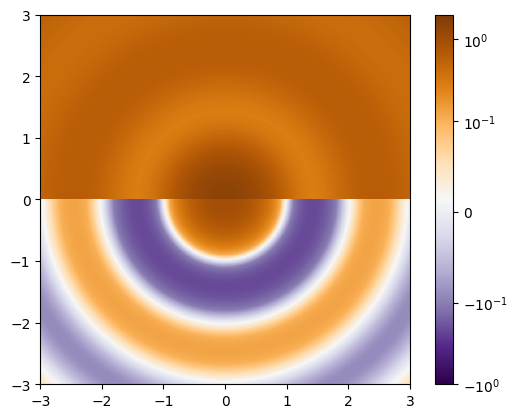

In [5]:
plt.imshow(
    z,
    extent=(x.min(), x.max(), y.min(), y.max()),
    norm=colors.SymLogNorm(linthresh=0.1, vmin=-1, vmax=2),
    cmap='PuOr_r',
    origin='lower',
    interpolation='nearest'
)
plt.colorbar();

As expected, the zero contours are not closed loops in this case, but instead half circles.

In [6]:
v_and_g = value_and_grad_wrapper(f, forward_mode_differentiation=True)

In [7]:
init_guess = jnp.array([[0.0, -0.6], [0.0, -1.6], [0.0, -2.6]])
paths, stopping_reason = zero_contour_finder(
    v_and_g,
    init_guess,
    delta=0.01,
    N=500
)
print(stopping_reason)

[[1 1]
 [1 1]
 [1 1]]


In all cases the zero finder terminated with `[1, 1]` indicating that it found an end point in both directions.

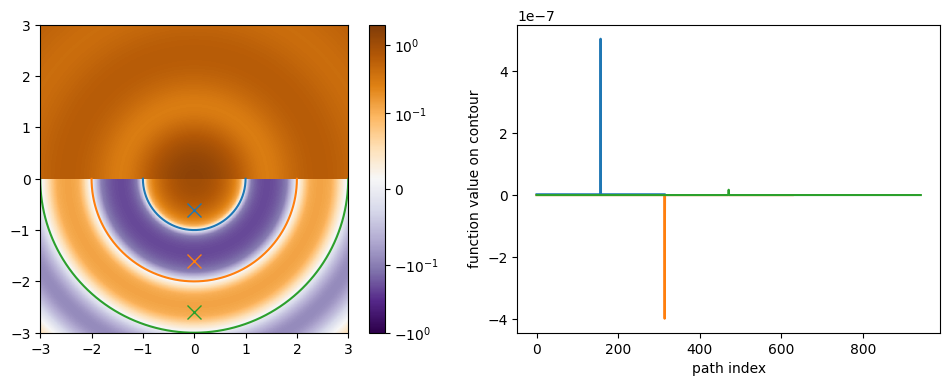

In [8]:
plt.figure(figsize=(12, 4))
plt.subplot(121)
plt.imshow(
    z,
    extent=(x.min(), x.max(), y.min(), y.max()),
    norm=colors.SymLogNorm(linthresh=0.1, vmin=-1, vmax=2),
    cmap='PuOr_r',
    origin='lower',
    interpolation='nearest'
)
plt.colorbar()
plt.plot(*paths['path'].T)
plt.plot(*init_guess[0], 'x', ms=10, color='C0')
plt.plot(*init_guess[1], 'x', ms=10, color='C1')
plt.plot(*init_guess[2], 'x', ms=10, color='C2')

plt.subplot(122)
plt.xlabel('path index')
plt.ylabel('function value on contour')
plt.plot(paths['value'].T);

We can see that the contour end points are correctly identified in the face of a discontinuity in the function.